# LAB 1

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

## Data
- OHLC data
- Fundamental data

In [66]:
# Lấy data từ Apple trên yahoo finance
data = yf.download("AAPL", start="2015-01-01", end="2025-10-01", progress = False)
data.tail()

C:\Users\Tam Nguyen\AppData\Local\Temp\ipykernel_15460\1103213229.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2015-01-01", end="2025-10-01", progress = False)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-09-24,252.065643,255.492329,250.796869,254.972829,42303700
2025-09-25,256.621216,256.920944,251.466225,252.964772,55202100
2025-09-26,255.212601,257.350528,253.534220,253.853917,46076300
2025-09-29,254.183594,254.753049,252.764971,254.313473,40127700
2025-09-30,254.383408,255.672152,252.864875,254.613181,37704300


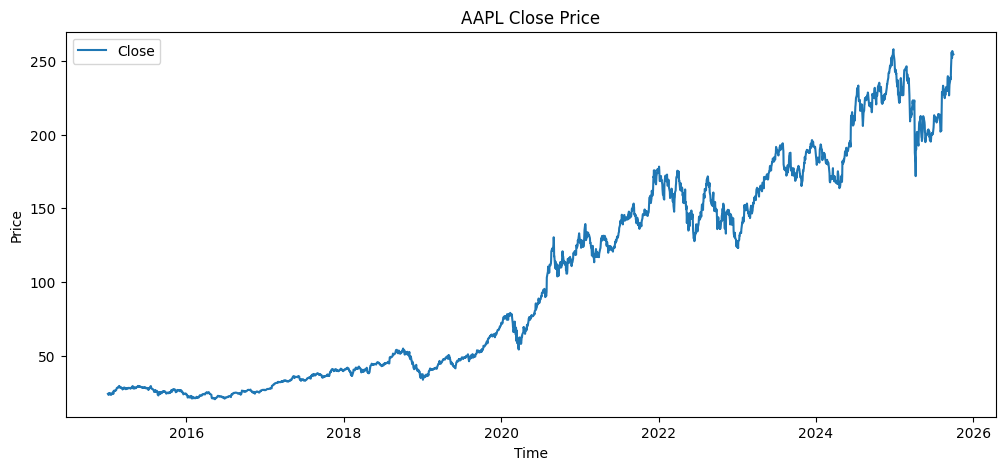

In [67]:
# Vẽ biểu đồ giá đóng
plt.figure(figsize=(12,5))
plt.plot(data['Close'], label='Close')      # Giá đóng

plt.legend()
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("AAPL Close Price")
plt.show()

## Technical indicators


### Simple moving average (SMA)


In [68]:
df = yf.download("AAPL", start="2022-01-01", end="2025-10-01", progress = False)

df['SMA_20'] = df['Close'].rolling(window=20).mean() # rolling windows 20 days
df['SMA_50'] = df['Close'].rolling(window=50).mean() # rolling windows 50 days
df['SMA_100'] = df['Close'].rolling(window=100).mean() # rolling windows 50 days
df['SMA_200'] = df['Close'].rolling(window=200).mean() # rolling windows 50 days


C:\Users\Tam Nguyen\AppData\Local\Temp\ipykernel_15460\1549998854.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2022-01-01", end="2025-10-01", progress = False)


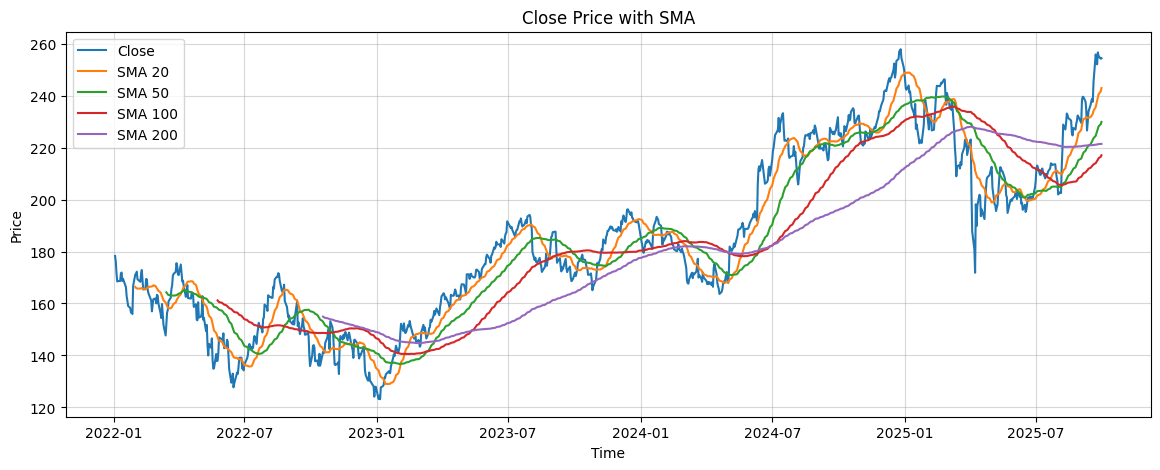

In [69]:
plt.figure(figsize=(14,5))
plt.plot(df['Close'], label='Close')
plt.plot(df['SMA_20'], label='SMA 20')    # SMA 20
plt.plot(df['SMA_50'], label='SMA 50')    # SMA 50
plt.plot(df['SMA_100'], label='SMA 100')  # SMA 100
plt.plot(df['SMA_200'], label='SMA 200')  # SMA 200
plt.grid(True, alpha=0.5)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Close Price with SMA")
plt.show()

- Identifying trend

## Momentum trading

Đang tải dữ liệu...


C:\Users\Tam Nguyen\AppData\Local\Temp\ipykernel_17004\1458824287.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date)['Close']
Failed to get ticker 'PFE' reason: Failed to perform, curl: (6) Could not resolve host: query2.finance.yahoo.com. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.
Failed to get ticker 'CVX' reason: Failed to perform, curl: (6) Could not resolve host: query2.finance.yahoo.com. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.
[**********************95%*********************  ]  19 of 20 completed

20 Failed downloads:
['UNH', 'JNJ', 'PG', 'JPM', 'AMZN', 'GOOGL', 'PFE', 'CVX', 'KO', 'AAPL', 'META', 'NVDA', 'TSLA', 'MSFT']: DNSError('Failed to perform, curl: (6) Could not resolve host: query2.finance.yahoo.com. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
['MA']: Timeout('Failed to perform, curl: (28) Resolv

Đang chạy Backtest...


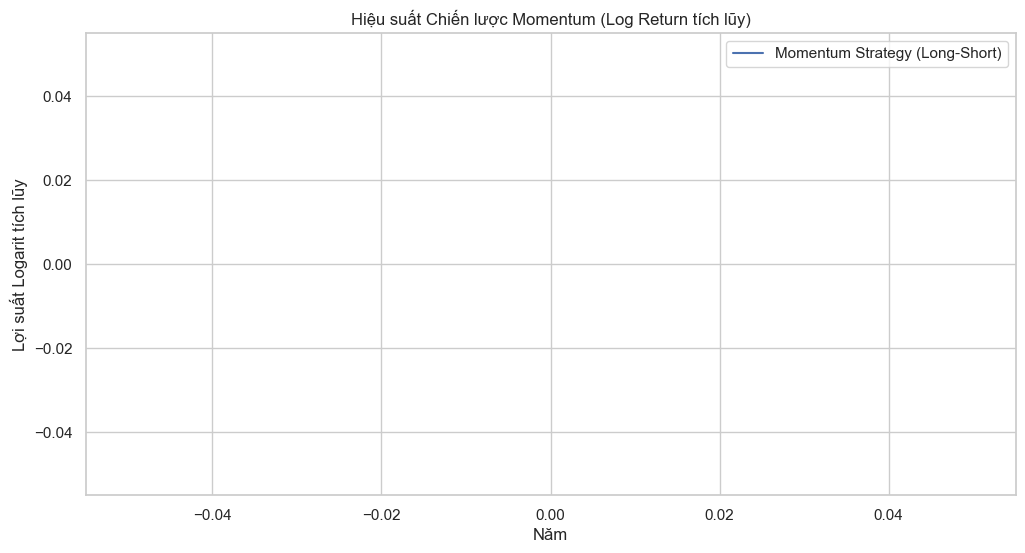


--- KẾT QUẢ ---
Tổng số tháng giao dịch: 0


IndexError: single positional indexer is out-of-bounds

In [7]:
# Slide 41 CF_week2and3

def get_data(tickers, start_date):
    """
    Lấy dữ liệu giá đóng cửa điều chỉnh (Adjusted Close)
    """
    print("Đang tải dữ liệu...")
    data = yf.download(tickers, start=start_date)['Close']
    return data

def calculate_momentum_strategy(data, n_stocks=5):
    """
    Thực hiện logic chiến lược Momentum
    :param data: DataFrame giá hàng ngày
    :param n_stocks: Số lượng cổ phiếu Long/Short (n)
    """
    # 1. Resample daily prices into month-end prices (Lấy giá cuối tháng)
    monthly_prices = data.resample('ME').last() # Dùng 'ME' thay vì 'M' cho pandas bản mới

    # 2. Calculate monthly log returns (Tính lợi suất logarit)
    # Công thức: ln(P_t / P_{t-1})
    monthly_log_returns = np.log(monthly_prices / monthly_prices.shift(1))

    # Tạo DataFrame để lưu lợi nhuận danh mục
    portfolio_returns = []
    index_dates = []

    # Bắt đầu vòng lặp từ tháng thứ 2 (để có dữ liệu return của tháng trước đó để rank)
    # Chúng ta dùng return tháng T để xếp hạng, và giữ vị thế trong tháng T+1

    print("Đang chạy Backtest...")

    for i in range(1, len(monthly_log_returns) - 1):
        # Lấy return của tháng hiện tại để xếp hạng (Formation Period)
        current_month_rets = monthly_log_returns.iloc[i]

        # Loại bỏ các mã không có dữ liệu (NaN)
        current_month_rets = current_month_rets.dropna()

        if len(current_month_rets) < 2 * n_stocks:
            continue # Không đủ cổ phiếu để chọn

        # 3. Rank stocks by returns (Xếp hạng)
        ranked_stocks = current_month_rets.sort_values(ascending=False)

        # 4. Long top n, Short bottom n
        long_stocks = ranked_stocks.head(n_stocks).index
        short_stocks = ranked_stocks.tail(n_stocks).index

        # 5. Calculate Return for the NEXT month (Holding Period)
        # Lợi nhuận thực tế là lợi nhuận của tháng sau (i+1) dựa trên danh mục chọn ở tháng i
        next_month_rets = monthly_log_returns.iloc[i+1]

        # Lấy lợi suất trung bình (Equal weighting)
        long_ret = next_month_rets[long_stocks].mean()
        short_ret = next_month_rets[short_stocks].mean()

        # 6. Portfolio Return
        # Long thắng khi giá tăng, Short thắng khi giá giảm (Short return = -Asset Return)
        # Công thức slide: (Long + Short) / 2.
        # Lưu ý: Trong thực tế short return là (Giá bán - Giá mua)/Giá bán.
        # Với log return, Short PnL = -1 * Log Return của tài sản đó.

        total_return = (long_ret - short_ret) / 2

        portfolio_returns.append(total_return)
        index_dates.append(monthly_log_returns.index[i+1])

    # Tổng hợp kết quả
    strategy_df = pd.DataFrame({'Monthly_Return': portfolio_returns}, index=index_dates)
    strategy_df['Cumulative_Return'] = strategy_df['Monthly_Return'].cumsum()

    return strategy_df

# --- CẤU HÌNH CHẠY THỬ ---

# Danh sách giả lập vũ trụ cổ phiếu (Thay vì toàn bộ S&P 500 để demo cho nhanh)
# Bao gồm các mã công nghệ, ngân hàng, y tế, tiêu dùng để đa dạng
universe = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', # Tech
    'JPM', 'BAC', 'V', 'MA', # Finance
    'JNJ', 'PFE', 'UNH', # Healthcare
    'PG', 'KO', 'PEP', 'WMT', # Consumer
    'XOM', 'CVX' # Energy
]

# Thời gian: Mid-2013 onward (như slide yêu cầu)
start_date = '2013-06-01'

# Chạy quy trình
df_prices = get_data(universe, start_date)
strategy_result = calculate_momentum_strategy(df_prices, n_stocks=3)

# --- VẼ BIỂU ĐỒ ---
plt.figure(figsize=(12, 6))
plt.plot(strategy_result.index, strategy_result['Cumulative_Return'], label='Momentum Strategy (Long-Short)')
plt.title('Hiệu suất Chiến lược Momentum (Log Return tích lũy)')
plt.xlabel('Năm')
plt.ylabel('Lợi suất Logarit tích lũy')
plt.legend()
plt.grid(True)
plt.show()

# In thống kê cơ bản
print("\n--- KẾT QUẢ ---")
print(f"Tổng số tháng giao dịch: {len(strategy_result)}")
print(f"Tổng lợi suất tích lũy: {strategy_result['Cumulative_Return'].iloc[-1]:.4f}")
print(f"Trung bình lợi suất tháng: {strategy_result['Monthly_Return'].mean():.4f}")

In [70]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.237547,24.705316,23.798597,24.694231,212818400
2015-01-05,23.554741,24.086801,23.368521,24.006992,257142000
2015-01-06,23.556959,23.816338,23.195601,23.619033,263188400
2015-01-07,23.887274,23.987034,23.654497,23.765343,160423600
2015-01-08,24.805084,24.862725,24.097887,24.215385,237458000


# UPDATE TO GITHUB

In [71]:
#! jupytext --to py LAB_1_SMA_MOMENTUM/lab1.ipynb

[jupytext] Reading LAB_1_SMA_MOMENTUM/hi.ipynb in format ipynb
[jupytext] Updating the timestamp of LAB_1_SMA_MOMENTUM/hi.py


In [74]:
! git add .
! git commit -m "Update lab 1"
! git push


[main 34ffa1b] Update lab 1
 1 file changed, 9 insertions(+), 27 deletions(-)


To https://github.com/tamnguyen-2905/CF_Tam22110193.git
   2ccc69e..34ffa1b  main -> main
